In [1]:
import pandas as pd
df=pd.read_csv("/content/mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [2]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

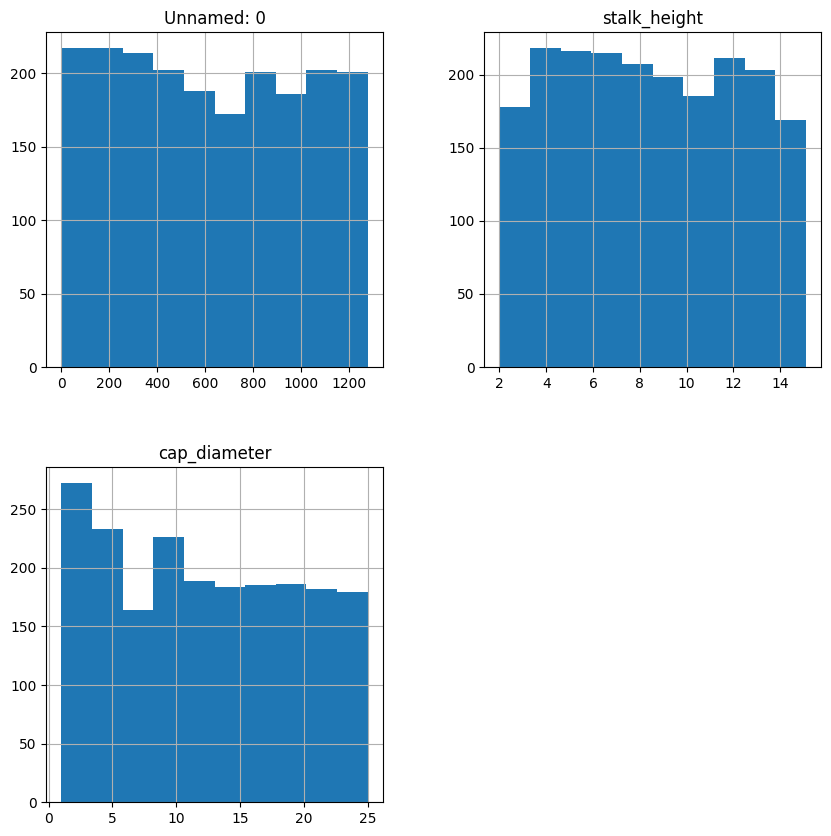

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(10,10))
plt.show()

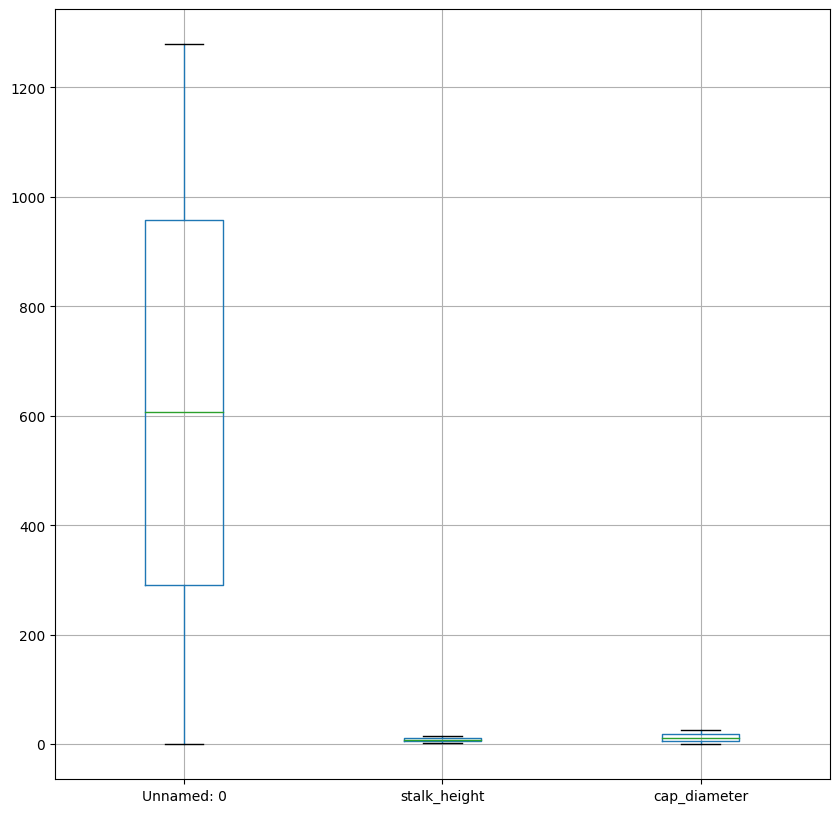

In [6]:
plt.figure(figsize=(10,10))
df.boxplot()
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for i in df.columns:
    if df[i].dtype == 'object':
        label_encoders[i] = LabelEncoder()
        df[i] = label_encoders[i].fit_transform(df[i])

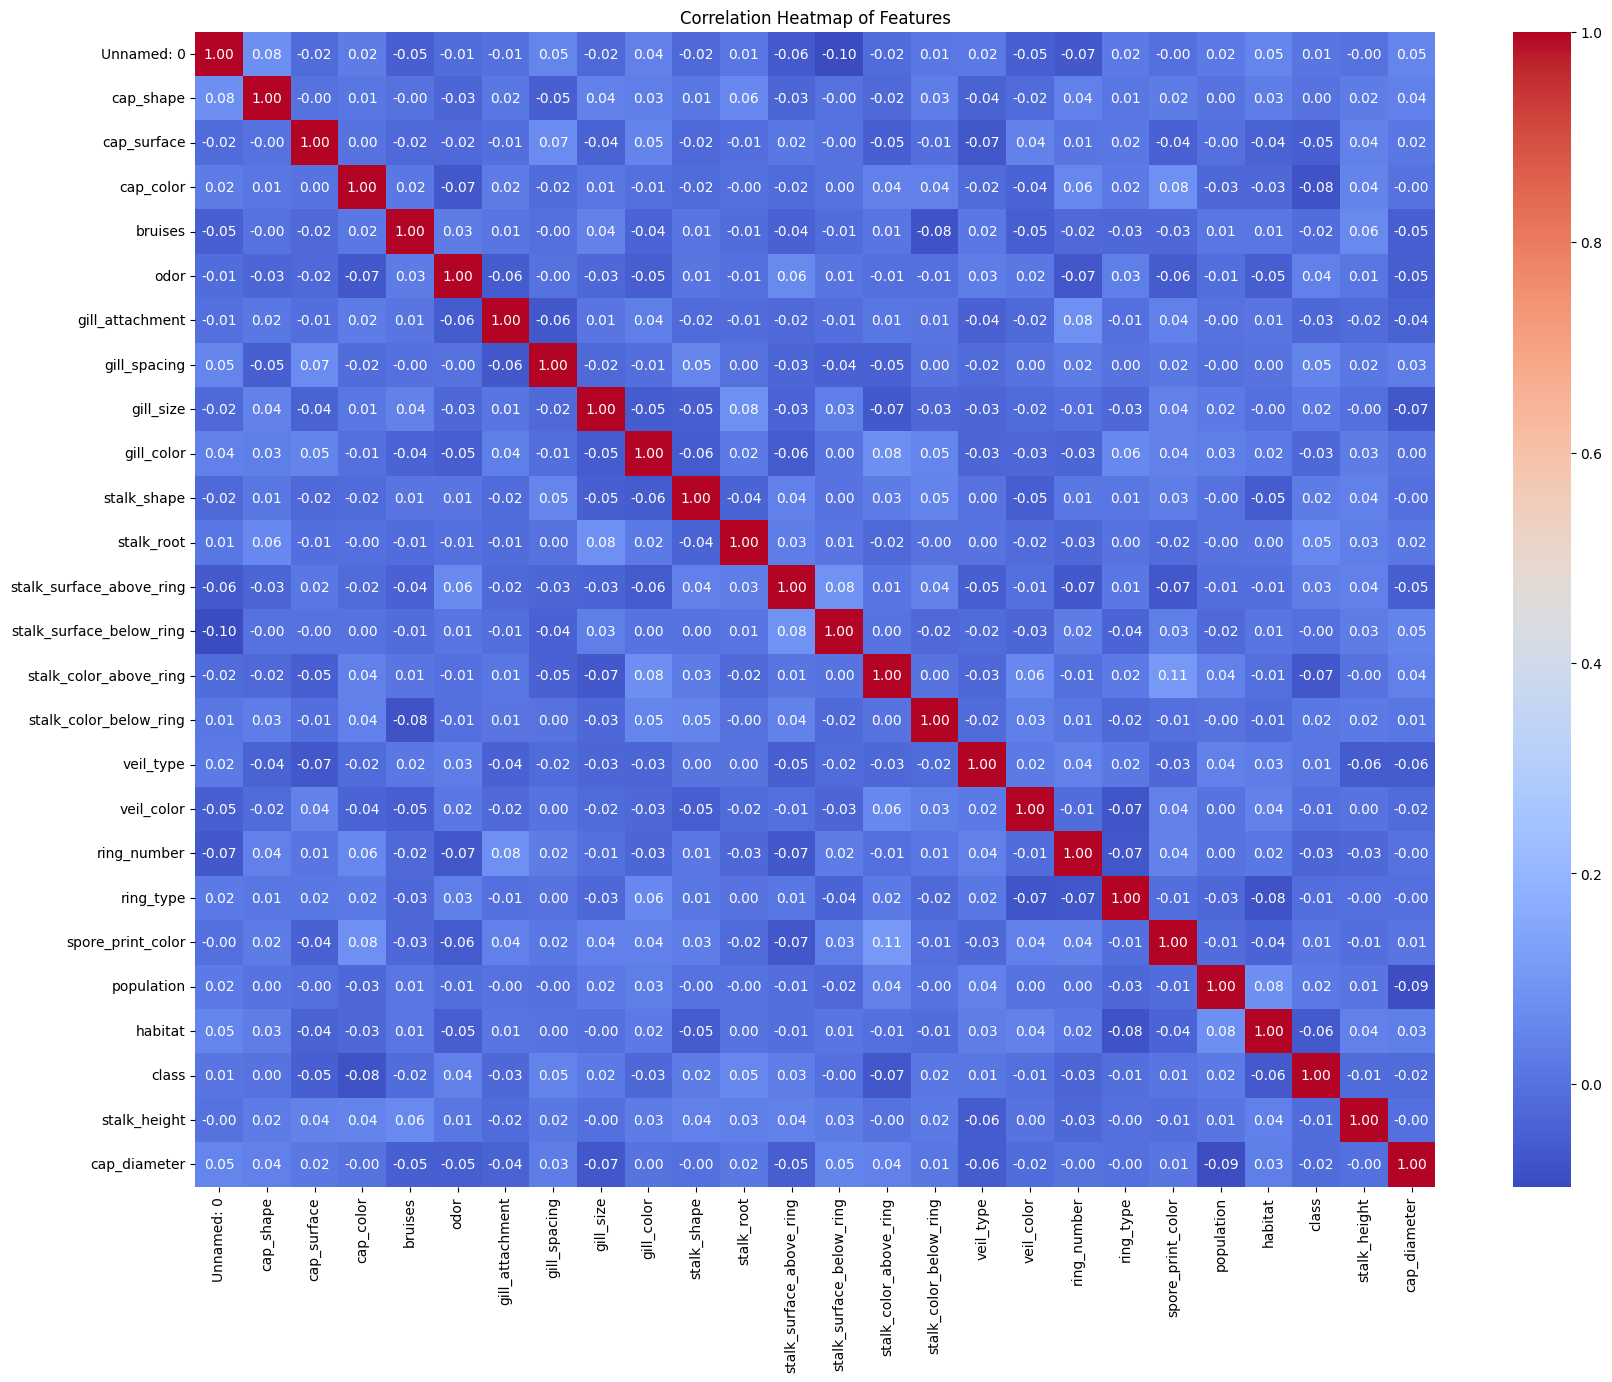

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

x=df.drop(columns=['cap_surface'])
y=df['cap_surface']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [10]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (1600, 25)
x_test shape: (400, 25)
y_train shape: (1600,)
y_test shape: (400,)


In [11]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

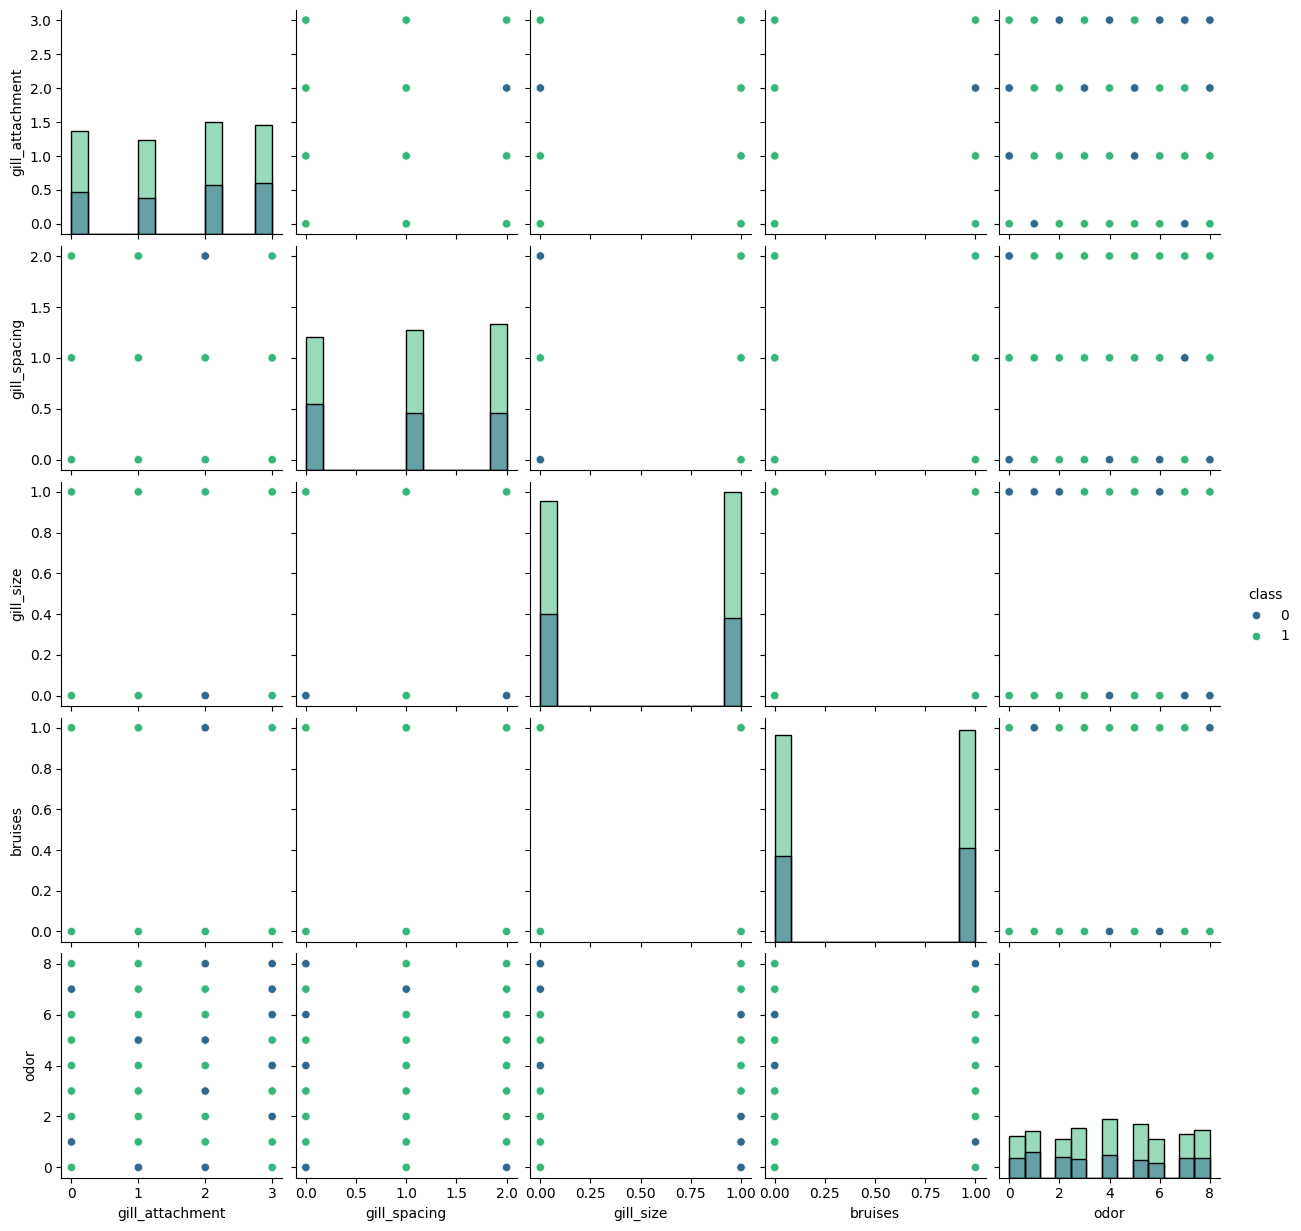

In [12]:
features_subset =['gill_attachment', 'gill_spacing', 'gill_size','bruises','odor']

sns.pairplot(df[features_subset + ['class']], hue='class', palette='viridis', diag_kind='hist')
plt.show()

<ipython-input-13-868059ce07bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class',data=df,palette='viridis')


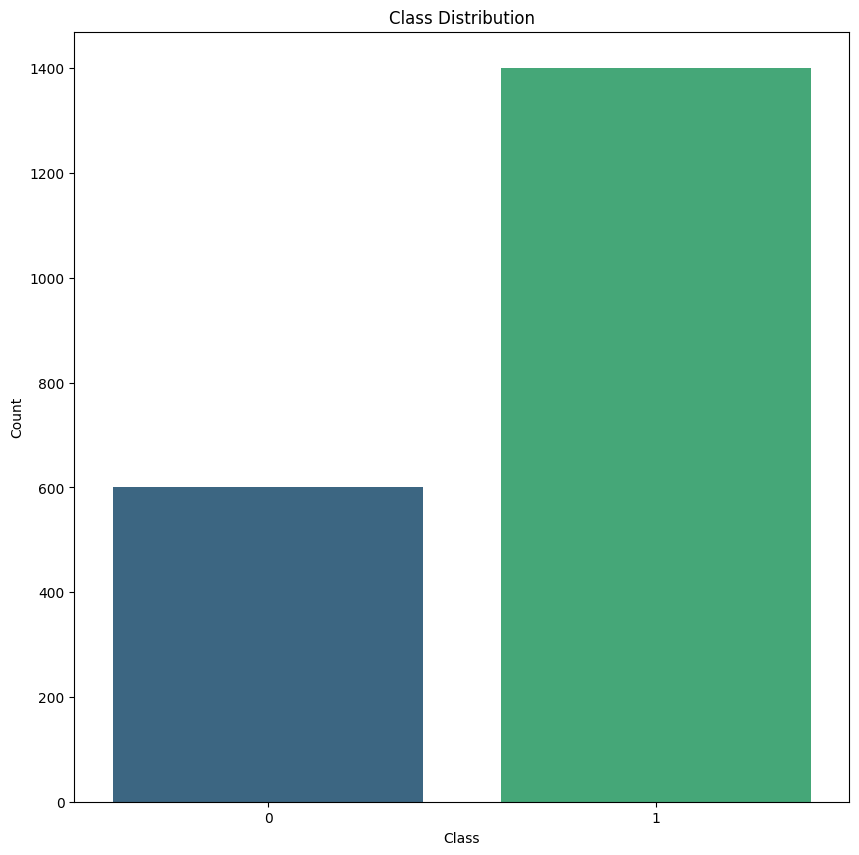

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(x='class',data=df,palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC

svm_classifier=SVC(kernel='linear',random_state=42)

In [15]:
svm_classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [16]:

y_pred=svm_classifier.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[27 11 47 16]
 [20 14 38 12]
 [18 18 49 31]
 [27 12 36 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.27      0.28       101
           1       0.25      0.17      0.20        84
           2       0.29      0.42      0.34       116
           3       0.29      0.24      0.26        99

    accuracy                           0.28       400
   macro avg       0.28      0.27      0.27       400
weighted avg       0.28      0.28      0.28       400


Accuracy Score:
0.285


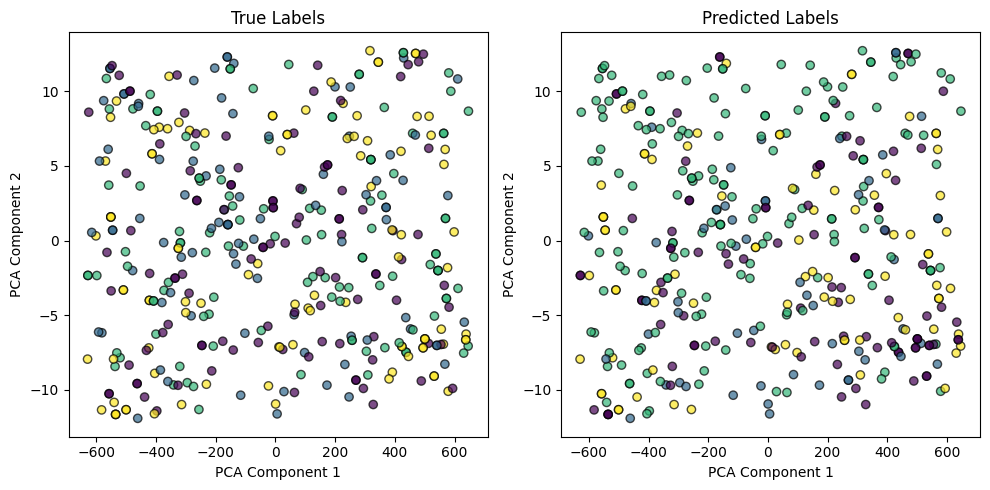

In [17]:
from sklearn.decomposition import PCA

# PCA to reduce the data to 2D
pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test)

# Ploting the true labels on the 2D plane
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
plt.title('True Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Ploting the predicted labels on the 2D plane
plt.subplot(1, 2, 2)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
plt.title('Predicted Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1],
    'gamma': ['scale'],
    'kernel': ['linear']
}

In [26]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)


In [27]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1], 'gamma': ['scale'], 'kernel': ['linear']},
             scoring='accuracy', verbose=2)

In [28]:

print("Best Parameters:")
print(grid_search.best_params_)
print("Best Score:")
print(grid_search.best_score_)

best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(x_test)

Best Parameters:
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score:
0.3125


In [29]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    print(f"Training SVM with {kernel} kernel")
    svm_classifier = SVC(kernel=kernel, random_state=42)
    svm_classifier.fit(x_train, y_train)
    y_pred = svm_classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel: {accuracy}")

    results[kernel] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }


Training SVM with linear kernel
Accuracy with linear kernel: 0.285
Training SVM with poly kernel
Accuracy with poly kernel: 0.29
Training SVM with rbf kernel


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy with rbf kernel: 0.275
Training SVM with sigmoid kernel


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy with sigmoid kernel: 0.2175


In [30]:
for kernel, result in results.items():
    print(f"\nResults for {kernel} kernel:")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("\nClassification Report:")
    print(result['classification_report'])
    print(f"Accuracy: {result['accuracy']}\n")


Results for linear kernel:
Confusion Matrix:
[[27 11 47 16]
 [20 14 38 12]
 [18 18 49 31]
 [27 12 36 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.27      0.28       101
           1       0.25      0.17      0.20        84
           2       0.29      0.42      0.34       116
           3       0.29      0.24      0.26        99

    accuracy                           0.28       400
   macro avg       0.28      0.27      0.27       400
weighted avg       0.28      0.28      0.28       400

Accuracy: 0.285


Results for poly kernel:
Confusion Matrix:
[[  0   0 101   0]
 [  0   0  84   0]
 [  0   0 116   0]
 [  0   0  99   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.00      0.00      0.00        84
           2       0.29      1.00      0.45       116
           3       0.00      0.00      0.00        99



**Strengths:**

Effective in High-Dimensional Spaces: SVMs perform well in high-dimensional spaces, which is advantageous given the number of features in the mushroom dataset.

Versatility with Kernels: The ability to use different kernel functions (linear, polynomial, RBF, sigmoid) allows SVM to handle various types of data distributions.

Regularization: SVM has a regularization parameter, which helps avoid overfitting and allows the model to generalize better.

**Weaknesses:**

Training Time: Training can be computationally intensive and slow, especially with large datasets.

Choice of Kernel: The performance is highly dependent on the choice of kernel and its parameters. Selecting the appropriate kernel and tuning parameters require careful cross-validation and experimentation.

Interpretability: SVMs, especially with non-linear kernels, are less interpretable compared to simpler models like decision trees.

Practical Implications:

Application in Medical Diagnostics: SVMs are often used in medical diagnostics to classify diseases based on various medical tests and features due to their high accuracy and effectiveness in high-dimensional data.

Text Classification and Sentiment Analysis: SVMs are commonly used in Natural Language Processing (NLP) tasks like text classification and sentiment analysis due to their robustness in handling large feature sets (e.g., TF-IDF vectors).

Image Classification: SVMs with RBF kernels are used in image classification tasks to differentiate between various classes based on pixel intensities and other image features.

Fraud Detection: The ability of SVMs to handle imbalanced datasets and identify outliers makes them suitable for fraud detection in finance and insurance sectors.